<a href="https://colab.research.google.com/github/foxbatcs/mca_data/blob/master/20210903_MCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maricopa County Assessor Anaylsis

## Libraries

In [ ]:
!pip3 install mcaapi

     |████████████████████████████████| 239 kB 32.2 MB/s 


In [ ]:
import mcaapi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Setup

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/foxbatcs/mca_data/master/202109_mca_10k_residential.csv')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('mode.chained_assignment', None)

In [ ]:
df.describe()

,lot_size_sf,price_usd,lat,lon,build_yr,build_size_sf,patio_ct,bath_fixtures_ct
count,10390.00,6149.00,10357.00,10357.00,10389.00,10389.00,10389.00,10388.00
mean,11597.93,394038.77,33.50,-112.07,1992.13,2183.40,1.13,8.49
std,19040.16,587503.99,0.13,0.22,18.61,1202.70,0.86,3.44
min,692.00,6500.00,33.21,-112.78,1900.00,416.00,0.00,2.00
25%,5753.00,181500.00,33.41,-112.26,1979.00,1506.00,1.00,6.00
50%,7320.00,266360.00,33.48,-112.08,1997.00,1904.00,1.00,8.00
75%,9900.75,383552.00,33.60,-111.90,2004.00,2481.00,1.00,10.00
max,775699.00,18000000.00,33.99,-111.58,2021.00,21866.00,12.00,41.00


In [ ]:
df.head()

,lot_size_sf,city,deed_date,price_usd,sale_date,lat,lon,build_yr,build_size_sf,patio_ct,patio_type,wall_type,roof_type,bath_fixtures_ct,parking_type
0,25063,PHOENIX,04/24/2020,525000.00,04/01/2020,33.35,-112.16,2007.00,4917.00,2.00,Covered,Frame Wood,Concrete Tile,13.00,GR
1,20756,PHOENIX,11/14/2017,337500.00,11/01/2017,33.35,-112.16,2007.00,2938.00,2.00,Covered,Frame Wood,Concrete Tile,14.00,GR
2,20810,PHOENIX,04/03/2020,545000.00,03/01/2020,33.35,-112.16,2007.00,5588.00,2.00,Covered Slab,Frame Wood,Concrete Tile,14.00,GR
3,20862,PHOENIX,07/16/2020,550000.00,05/01/2020,33.35,-112.16,2007.00,3849.00,4.00,Covered Slab,Frame Stucco,Concrete Tile,14.00,GR
4,22101,PHOENIX,04/10/2019,nan,NaN,33.35,-112.16,2007.00,5588.00,2.00,Covered Slab,Frame Wood,Concrete Tile,14.00,GR


## Initial Exploratory Data Analysis

### Bar Charts

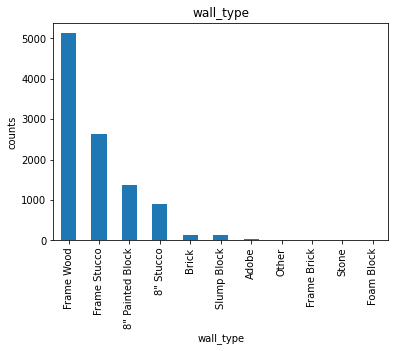

In [ ]:

df['wall_type'].value_counts().plot(kind = 'bar')

plt.title('wall_type')
plt.xlabel('wall_type')
plt.ylabel('counts');

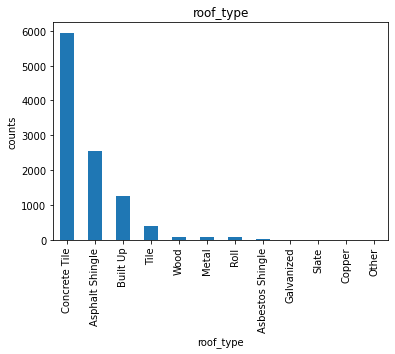

In [ ]:
df['roof_type'].value_counts().plot(kind = 'bar')

plt.title('roof_type')
plt.xlabel('roof_type')
plt.ylabel('counts');

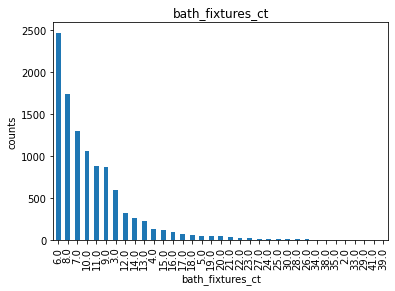

In [ ]:
df['bath_fixtures_ct'].value_counts().plot(kind = 'bar')

plt.title('bath_fixtures_ct')
plt.xlabel('bath_fixtures_ct')
plt.ylabel('counts');

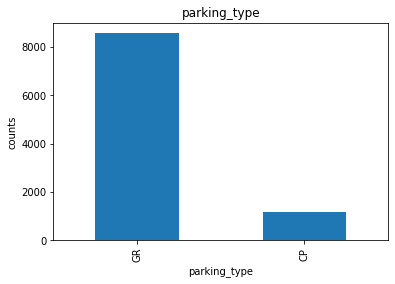

In [ ]:
df['parking_type'].value_counts().plot(kind = 'bar')

plt.title('parking_type')
plt.xlabel('parking_type')
plt.ylabel('counts');

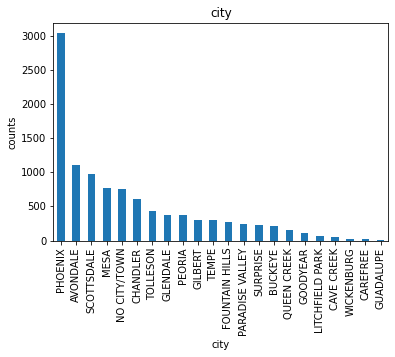

In [ ]:
df['city'].value_counts().plot(kind = 'bar')

plt.title('city')
plt.xlabel('city')
plt.ylabel('counts');

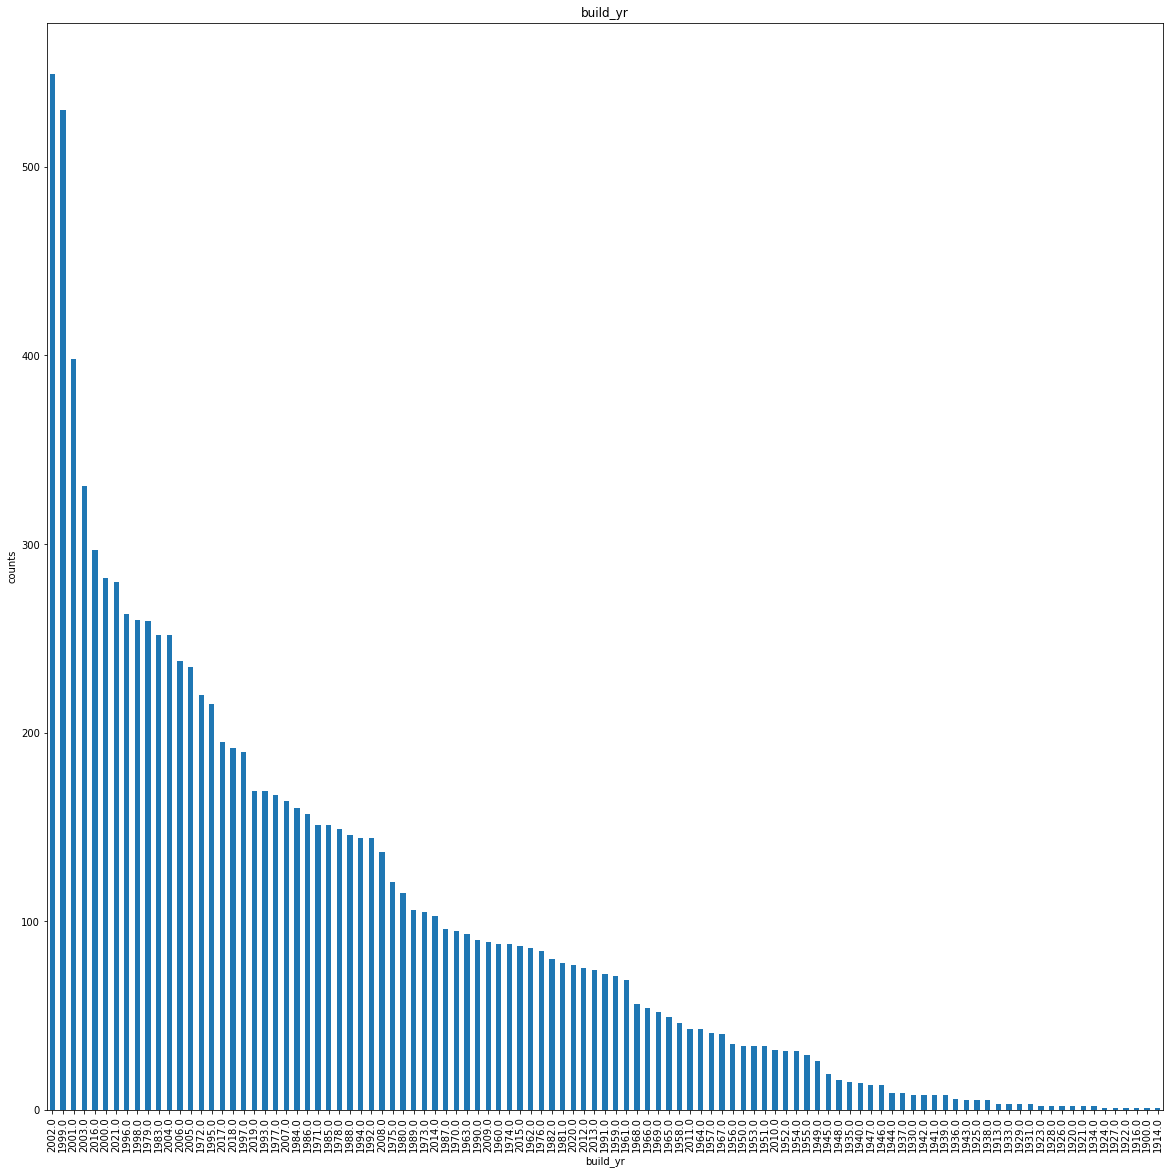

In [ ]:
df['build_yr'].value_counts().plot(kind = 'bar', figsize = (20,20))

plt.title('build_yr')
plt.xlabel('build_yr')
plt.ylabel('counts');

### Correlations and Scatter Plots

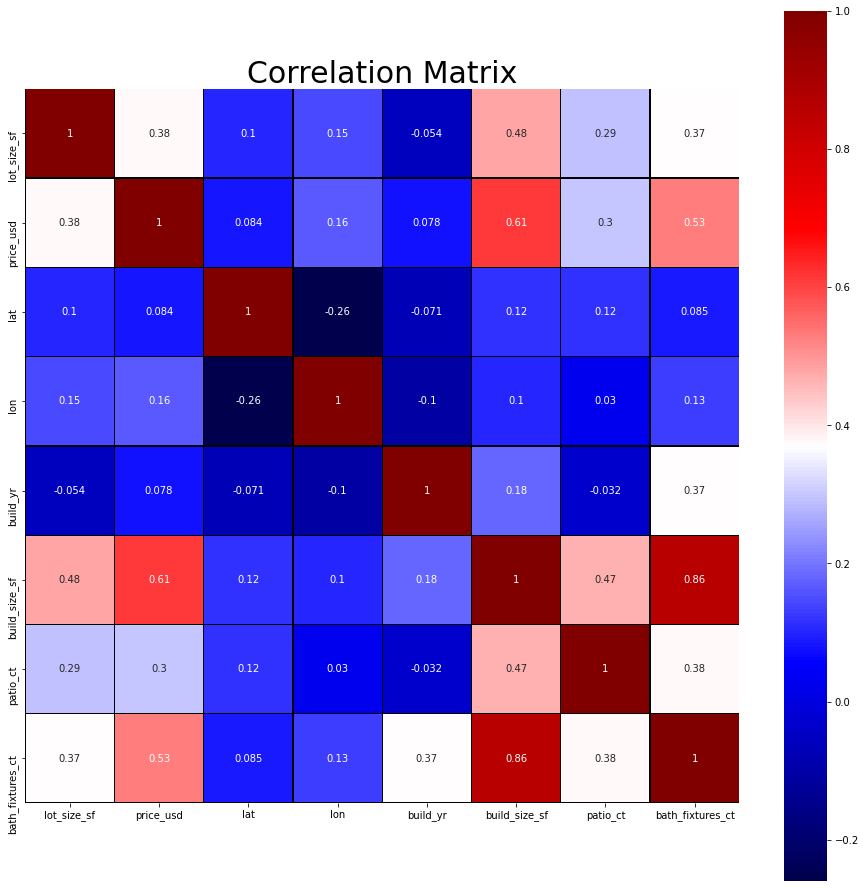

In [ ]:
plt.figure(figsize = (16, 16))
sns.heatmap(df.corr(),
            linewidths = 0.25,
            square = True,
            cmap = 'seismic',
            linecolor = 'black',
            annot = True)

plt.title('Correlation Matrix', fontsize = 30);

### Scatter Plots

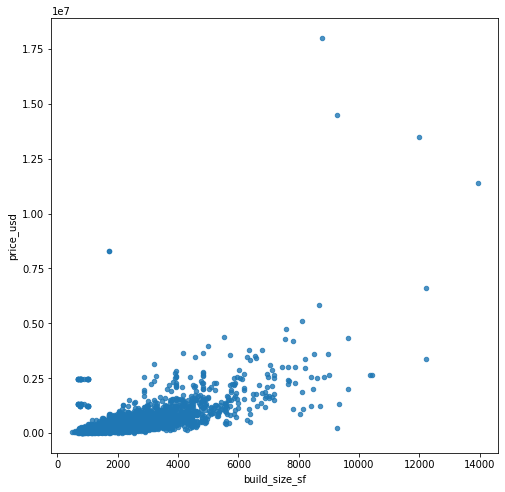

In [ ]:
df.plot(kind = 'scatter',
        x = 'build_size_sf',
        y = 'price_usd',
        figsize = (8,8),
        alpha = 0.8);

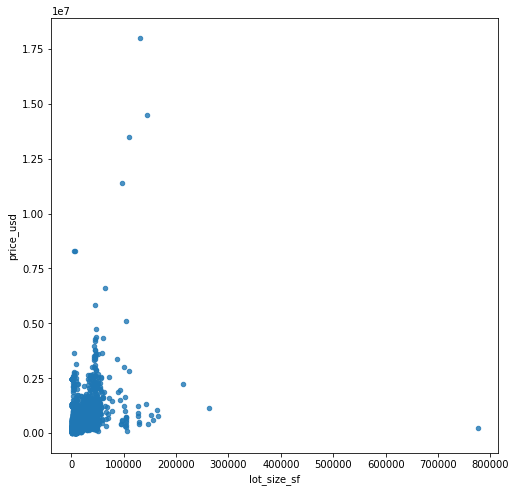

In [ ]:
df.plot(kind = 'scatter',
        x = 'lot_size_sf',
        y = 'price_usd',
        figsize = (8,8),
        alpha = 0.8);

In [ ]:
df.head()

,lot_size_sf,city,deed_date,price_usd,sale_date,lat,lon,build_yr,build_size_sf,patio_ct,patio_type,wall_type,roof_type,bath_fixtures_ct,parking_type
0,25063,PHOENIX,04/24/2020,525000.000000,04/01/2020,33.352338,-112.156826,2007.000000,4917.000000,2.000000,Covered,Frame Wood,Concrete Tile,13.000000,GR
1,20756,PHOENIX,11/14/2017,337500.000000,11/01/2017,33.352386,-112.157233,2007.000000,2938.000000,2.000000,Covered,Frame Wood,Concrete Tile,14.000000,GR
2,20810,PHOENIX,04/03/2020,545000.000000,03/01/2020,33.352385,-112.157580,2007.000000,5588.000000,2.000000,Covered Slab,Frame Wood,Concrete Tile,14.000000,GR
3,20862,PHOENIX,07/16/2020,550000.000000,05/01/2020,33.352384,-112.157927,2007.000000,3849.000000,4.000000,Covered Slab,Frame Stucco,Concrete Tile,14.000000,GR
4,22101,PHOENIX,04/10/2019,nan,NaN,33.352383,-112.158284,2007.000000,5588.000000,2.000000,Covered Slab,Frame Wood,Concrete Tile,14.000000,GR


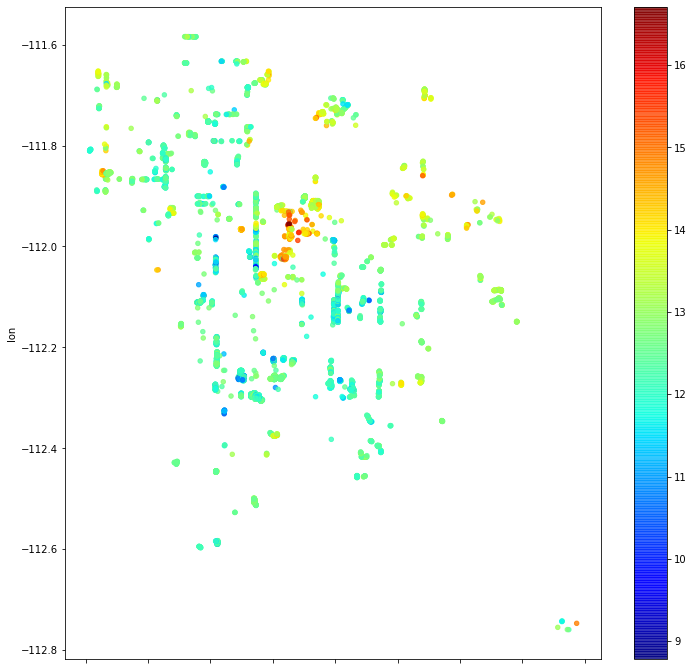

In [ ]:
df.plot(
    kind = 'scatter',
    x = 'lat',
    y = 'lon',
    figsize = (12,12),
    c = np.log(df['price_usd']),
    cmap = plt.get_cmap('jet'),
    colorbar = True,
    alpha = 0.8);

## Data Cleaning

In [ ]:
df.isna().sum().sort_values(ascending = False)

price_usd           4241
sale_date           4235
parking_type         632
lon                   33
lat                   33
deed_date              5
bath_fixtures_ct       2
roof_type              1
wall_type              1
patio_type             1
patio_ct               1
build_size_sf          1
build_yr               1
city                   0
lot_size_sf            0
dtype: int64

### Rows without Price Data

In [ ]:
no_price_df = df[df['price_usd'].notna()==False]

In [ ]:
no_price_df.shape

(4241, 15)

In [ ]:
no_price_df.isna().sum()

lot_size_sf            0
city                   0
deed_date              5
price_usd           4241
sale_date           4235
lat                   13
lon                   13
build_yr               1
build_size_sf          1
patio_ct               1
patio_type             1
wall_type              1
roof_type              1
bath_fixtures_ct       2
parking_type         347
dtype: int64

In [ ]:
no_price_df.isna().mean()

lot_size_sf        0.00
city               0.00
deed_date          0.00
price_usd          1.00
sale_date          1.00
lat                0.00
lon                0.00
build_yr           0.00
build_size_sf      0.00
patio_ct           0.00
patio_type         0.00
wall_type          0.00
roof_type          0.00
bath_fixtures_ct   0.00
parking_type       0.08
dtype: float64

In [ ]:
no_price_df.drop(['price_usd', 'sale_date'], axis = 1, inplace = True)

In [ ]:
no_price_df.shape

(4241, 13)

In [ ]:
no_price_df.dropna(axis = 0, inplace = True)

In [ ]:
no_price_df.isna().sum()

lot_size_sf         0
city                0
deed_date           0
lat                 0
lon                 0
build_yr            0
build_size_sf       0
patio_ct            0
patio_type          0
wall_type           0
roof_type           0
bath_fixtures_ct    0
parking_type        0
dtype: int64

In [ ]:
no_price_df.shape

(3876, 13)

### Rows with Price Data

In [ ]:
price_df = df[df['price_usd'].notna()==True]

In [ ]:
price_df.shape

(6149, 15)

In [ ]:
price_df.isna().sum()

lot_size_sf           0
city                  0
deed_date             0
price_usd             0
sale_date             0
lat                  20
lon                  20
build_yr              0
build_size_sf         0
patio_ct              0
patio_type            0
wall_type             0
roof_type             0
bath_fixtures_ct      0
parking_type        285
dtype: int64

In [ ]:
price_df.dropna(subset = ['parking_type', 'lat', 'lon'], axis = 0, inplace = True)

In [ ]:
price_df.shape

(5847, 15)

In [ ]:
price_df['deed_date'] = pd.to_datetime(price_df['deed_date'])

In [ ]:
price_df['sale_date'] = pd.to_datetime(price_df['sale_date'])

### One-Hot Encoding Categorical Values

In [ ]:
city = pd.get_dummies(price_df['city'])
patio_type = pd.get_dummies(price_df['patio_type'])
wall_type = pd.get_dummies(price_df['wall_type'])
roof_type = pd.get_dummies(price_df['roof_type'])
parking_type = pd.get_dummies(price_df['parking_type'])

In [ ]:
price_master_df = pd.concat([price_df, city, patio_type, wall_type, roof_type, parking_type], axis = 1)

In [ ]:
price_master_df.head()

,lot_size_sf,city,deed_date,price_usd,sale_date,lat,lon,build_yr,build_size_sf,patio_ct,patio_type,wall_type,roof_type,bath_fixtures_ct,parking_type,AVONDALE,BUCKEYE,CAREFREE,CAVE CREEK,CHANDLER,FOUNTAIN HILLS,GILBERT,GLENDALE,GOODYEAR,LITCHFIELD PARK,MESA,NO CITY/TOWN,PARADISE VALLEY,PEORIA,PHOENIX,QUEEN CREEK,SCOTTSDALE,SURPRISE,TEMPE,TOLLESON,WICKENBURG,Covered,Covered Slab,None,Slab,"8"" Painted Block","8"" Stucco",Adobe,Brick,Frame Brick,Frame Stucco,Frame Wood,Other,Slump Block,Asbestos Shingle,Asphalt Shingle,Built Up,Concrete Tile,Metal,Roll,Slate,Tile,Wood,CP,GR
0,25063,PHOENIX,2020-04-24,525000.00,2020-04-01,33.35,-112.16,2007.00,4917.00,2.00,Covered,Frame Wood,Concrete Tile,13.00,GR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,20756,PHOENIX,2017-11-14,337500.00,2017-11-01,33.35,-112.16,2007.00,2938.00,2.00,Covered,Frame Wood,Concrete Tile,14.00,GR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,20810,PHOENIX,2020-04-03,545000.00,2020-03-01,33.35,-112.16,2007.00,5588.00,2.00,Covered Slab,Frame Wood,Concrete Tile,14.00,GR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,20862,PHOENIX,2020-07-16,550000.00,2020-05-01,33.35,-112.16,2007.00,3849.00,4.00,Covered Slab,Frame Stucco,Concrete Tile,14.00,GR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,18274,PHOENIX,2016-12-28,430000.00,2016-12-01,33.35,-112.16,2007.00,5588.00,3.00,Covered Slab,Frame Wood,Concrete Tile,14.00,GR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


### Numeric Data Only

In [ ]:
numeric_data = price_master_df.select_dtypes(include='number')

In [ ]:
numeric_data.head()

,lot_size_sf,price_usd,lat,lon,build_yr,build_size_sf,patio_ct,bath_fixtures_ct,AVONDALE,BUCKEYE,CAREFREE,CAVE CREEK,CHANDLER,FOUNTAIN HILLS,GILBERT,GLENDALE,GOODYEAR,LITCHFIELD PARK,MESA,NO CITY/TOWN,PARADISE VALLEY,PEORIA,PHOENIX,QUEEN CREEK,SCOTTSDALE,SURPRISE,TEMPE,TOLLESON,WICKENBURG,Covered,Covered Slab,None,Slab,"8"" Painted Block","8"" Stucco",Adobe,Brick,Frame Brick,Frame Stucco,Frame Wood,Other,Slump Block,Asbestos Shingle,Asphalt Shingle,Built Up,Concrete Tile,Metal,Roll,Slate,Tile,Wood,CP,GR
0,25063,525000.00,33.35,-112.16,2007.00,4917.00,2.00,13.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,20756,337500.00,33.35,-112.16,2007.00,2938.00,2.00,14.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,20810,545000.00,33.35,-112.16,2007.00,5588.00,2.00,14.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,20862,550000.00,33.35,-112.16,2007.00,3849.00,4.00,14.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,18274,430000.00,33.35,-112.16,2007.00,5588.00,3.00,14.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


# Modeling

In [ ]:
X = numeric_data.drop(['price_usd'], axis = 1)
y = numeric_data['price_usd']

In [ ]:
# data analysis packages
import numpy as np
import pandas as pd

# plotting package
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

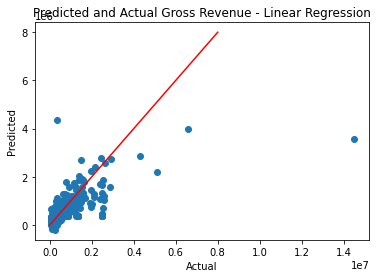

In [ ]:
y_pred_lr = lr.predict(X_test)

plt.scatter(y_test, y_pred_lr)
plt.plot([0,8e6], [0,8e6], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Gross Revenue - Linear Regression');

In [ ]:
print('Evaluate Linear Regression')
lr_r2 = lr.score(X_test, y_test)
print('R Squared:\t', lr_r2)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print('RMSE:\t\t', lr_rmse)

Evaluate Linear Regression
R Squared:	 0.47158648163051464
RMSE:		 462432.7622112099


In [ ]:
coefs = pd.DataFrame(zip(X.columns, lr.coef_), 
                     columns=['Feature Names', 'Coefficients'])
print('Intercept: ', lr.intercept_)
coefs.sort_values('Coefficients', ascending=False)

Intercept:  66593786.58891141


,Feature Names,Coefficients
39,Other,3460749.15
19,PARADISE VALLEY,946872.03
2,lon,643637.84
27,WICKENBURG,283560.62
24,SURPRISE,160316.77
50,CP,112078.52
23,SCOTTSDALE,111345.91
8,BUCKEYE,103623.59
15,GOODYEAR,102997.83
30,None,86064.52


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

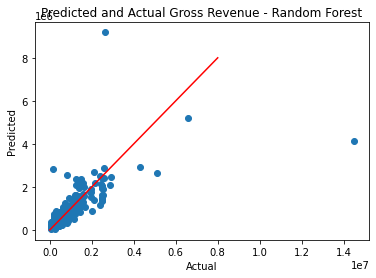

In [ ]:
y_pred_rf = rf.predict(X_test)

plt.scatter(y_test, y_pred_rf)
plt.plot([0,8e6], [0,8e6], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Gross Revenue - Random Forest');

In [ ]:
print('Evaluating Random Forest')
rf_r2 = rf.score(X_test, y_test)
print('R-Squared: \t', rf_r2)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('RMSE: \t\t', rf_rmse)

Evaluating Random Forest
R-Squared: 	 0.5687193113688958
RMSE: 		 417774.2243028962


In [ ]:
import_rf = pd.DataFrame(zip(X.columns, rf.feature_importances_),
                         columns=['Feature Names', 'Feature Importances'])
import_rf.sort_values('Feature Importances', ascending=False)


,Feature Names,Feature Importances
4,build_size_sf,0.35
6,bath_fixtures_ct,0.29
2,lon,0.11
0,lot_size_sf,0.08
1,lat,0.06
3,build_yr,0.05
19,PARADISE VALLEY,0.02
23,SCOTTSDALE,0.01
5,patio_ct,0.01
44,Concrete Tile,0.01


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

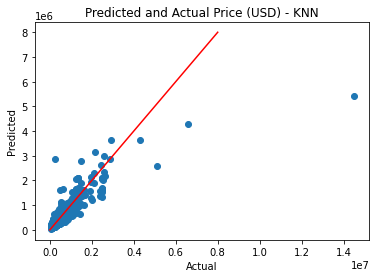

In [ ]:
y_pred_knn = knn.predict(X_test)

plt.scatter(y_test, y_pred_knn)
plt.plot([0,8e6], [0,8e6], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Price (USD) - KNN');

In [ ]:
print('Evaluating KNN')
knn_r2 = knn.score(X_test, y_test)
print('R-Squared: \t', knn_r2)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print('RMSE: \t\t', knn_rmse)

Evaluating KNN
R-Squared: 	 0.7111419346049601
RMSE: 		 341903.7660203895


## Comparison

In [ ]:
# Setting up our evaluation metrics so we can compare
r2s = [lr_r2, rf_r2, knn_r2]
rmses = [lr_rmse, rf_rmse, knn_rmse]
model_names = ['Linear Regression', 'Random Forest', 'K-Nearest Neighbors']
# Putting all of the metrics together
comparison = pd.DataFrame(zip(model_names, r2s, rmses),
                           columns=['Model', 'R-Squared', 'RMSE'])
comparison

,Model,R-Squared,RMSE
0,Linear Regression,0.47,462432.76
1,Random Forest,0.57,417774.22
2,K-Nearest Neighbors,0.71,341903.77


# Prediction

In [ ]:
no_price_df.head()

,lot_size_sf,city,deed_date,lat,lon,build_yr,build_size_sf,patio_ct,patio_type,wall_type,roof_type,bath_fixtures_ct,parking_type
4,22101,PHOENIX,04/10/2019,33.35,-112.16,2007.00,5588.00,2.00,Covered Slab,Frame Wood,Concrete Tile,14.00,GR
12,6000,SURPRISE,01/16/2020,33.63,-112.45,2012.00,1734.00,2.00,Covered Slab,Frame Stucco,Concrete Tile,6.00,GR
15,6000,SURPRISE,10/31/2016,33.63,-112.45,2012.00,2645.00,4.00,Covered Slab,Frame Stucco,Concrete Tile,10.00,GR
21,6000,SURPRISE,07/06/2016,33.63,-112.46,2009.00,1571.00,1.00,Covered,Frame Stucco,Concrete Tile,8.00,GR
22,6000,SURPRISE,04/14/2021,33.63,-112.46,2010.00,1795.00,1.00,Covered,Frame Stucco,Concrete Tile,8.00,GR


In [ ]:
n_city = pd.get_dummies(no_price_df['city'])
n_patio_type = pd.get_dummies(no_price_df['patio_type'])
n_wall_type = pd.get_dummies(no_price_df['wall_type'])
n_roof_type = pd.get_dummies(no_price_df['roof_type'])
n_parking_type = pd.get_dummies(no_price_df['parking_type'])

In [ ]:
no_price_master_df = pd.concat([no_price_df, n_city, n_patio_type, n_wall_type, n_roof_type, n_parking_type], axis = 1)

In [ ]:
n_numeric_data = no_price_master_df.select_dtypes(include='number')

In [ ]:
X.columns

Index(['lot_size_sf', 'lat', 'lon', 'build_yr', 'build_size_sf', 'patio_ct',
       'bath_fixtures_ct', 'AVONDALE', 'BUCKEYE', 'CAREFREE', 'CAVE CREEK',
       'CHANDLER', 'FOUNTAIN HILLS', 'GILBERT', 'GLENDALE', 'GOODYEAR',
       'LITCHFIELD PARK', 'MESA', 'NO CITY/TOWN', 'PARADISE VALLEY', 'PEORIA',
       'PHOENIX', 'QUEEN CREEK', 'SCOTTSDALE', 'SURPRISE', 'TEMPE', 'TOLLESON',
       'WICKENBURG', 'Covered', 'Covered Slab', 'None', 'Slab',
       '8" Painted Block', '8" Stucco', 'Adobe', 'Brick', 'Frame Brick',
       'Frame Stucco', 'Frame Wood', 'Other', 'Slump Block',
       'Asbestos Shingle', 'Asphalt Shingle', 'Built Up', 'Concrete Tile',
       'Metal', 'Roll', 'Slate', 'Tile', 'Wood', 'CP', 'GR'],
      dtype='object')

In [ ]:
n_numeric_data.columns

Index(['lot_size_sf', 'lat', 'lon', 'build_yr', 'build_size_sf', 'patio_ct',
       'bath_fixtures_ct', 'AVONDALE', 'BUCKEYE', 'CAREFREE', 'CAVE CREEK',
       'CHANDLER', 'FOUNTAIN HILLS', 'GILBERT', 'GLENDALE', 'GOODYEAR',
       'GUADALUPE', 'LITCHFIELD PARK', 'MESA', 'NO CITY/TOWN',
       'PARADISE VALLEY', 'PEORIA', 'PHOENIX', 'QUEEN CREEK', 'SCOTTSDALE',
       'SURPRISE', 'TEMPE', 'TOLLESON', 'WICKENBURG', 'Covered',
       'Covered Slab', 'None', 'Slab', '8" Painted Block', '8" Stucco',
       'Adobe', 'Brick', 'Foam Block', 'Frame Brick', 'Frame Stucco',
       'Frame Wood', 'Other', 'Slump Block', 'Stone', 'Asbestos Shingle',
       'Asphalt Shingle', 'Built Up', 'Concrete Tile', 'Galvanized', 'Metal',
       'Roll', 'Slate', 'Tile', 'Wood', 'CP', 'GR'],
      dtype='object')

In [ ]:
n_numeric_data.drop(['GUADALUPE', 'Foam Block', 'Galvanized', 'Stone'], axis = 1, inplace = True)

In [ ]:
n_numeric_data.columns

Index(['lot_size_sf', 'lat', 'lon', 'build_yr', 'build_size_sf', 'patio_ct',
       'bath_fixtures_ct', 'AVONDALE', 'BUCKEYE', 'CAREFREE', 'CAVE CREEK',
       'CHANDLER', 'FOUNTAIN HILLS', 'GILBERT', 'GLENDALE', 'GOODYEAR',
       'LITCHFIELD PARK', 'MESA', 'NO CITY/TOWN', 'PARADISE VALLEY', 'PEORIA',
       'PHOENIX', 'QUEEN CREEK', 'SCOTTSDALE', 'SURPRISE', 'TEMPE', 'TOLLESON',
       'WICKENBURG', 'Covered', 'Covered Slab', 'None', 'Slab',
       '8" Painted Block', '8" Stucco', 'Adobe', 'Brick', 'Frame Brick',
       'Frame Stucco', 'Frame Wood', 'Other', 'Slump Block',
       'Asbestos Shingle', 'Asphalt Shingle', 'Built Up', 'Concrete Tile',
       'Metal', 'Roll', 'Slate', 'Tile', 'Wood', 'CP', 'GR'],
      dtype='object')

In [ ]:
no_price_df['pred_price_usd'] = knn.predict(n_numeric_data)

In [ ]:
no_price_df.to_csv('price_predictions.csv')